In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import xgboost as XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [438]:
HMP1_metaphlan4 = pd.read_csv('~/Desktop/control_group/HMP1/HMP1.csv').set_index('Abundance').T
HMP1_METADATA = pd.read_csv('~/Desktop/control_group/HMP1/HMP.phase1.info.txt', delimiter = "\t")

In [439]:
HMP2_metaphlan4 = pd.read_csv('~/Desktop/control_group/HMP2/HMP2.csv').set_index('Abundance').T
HMP2_METADATA = pd.read_csv('~/Desktop/control_group/HMP2/HMP.phase2.info.txt', delimiter = "\t")

In [440]:
HMP3_metaphlan4 = pd.read_csv('~/Desktop/control_group/HMP3/HMP3.csv').set_index('Abundance').T
HMP3_METADATA = pd.read_csv('~/Desktop/control_group/HMP3/HMP.phase3.info.txt', delimiter = "\t")

In [441]:
Lewis_metaphlan4 = pd.read_csv('~/Desktop/control_group/Lewis/Lewis.csv').set_index('Abundance').T
Lewis_METADATA = pd.read_csv('~/Desktop/control_group/Lewis/SRP057027.info.txt', delimiter = "\t").set_index('Sample')

In [442]:
IBD_metaphlan4 = pd.read_csv('~/Desktop/Metaphlan4_MGX_Control.csv').set_index('Abundance').T
IBD_METADATA = pd.read_csv('~/Desktop/selected_samples_MGX.csv').set_index('External ID')

In [443]:
HMP1_METADATA = HMP1_METADATA.sample(20)
HMP1_metaphlan4 = HMP1_metaphlan4.loc[HMP1_METADATA.index,:]
HMP1_metaphlan4 = HMP1_metaphlan4.loc[:,HMP1_metaphlan4.columns.str.startswith('s__')]
HMP1_metaphlan4["Type"] = 'HMP1'
HMP1_metaphlan4

Abundance,s__Bacteroides_uniformis,s__Phocaeicola_vulgatus,s__Bacteroides_xylanisolvens,s__Parabacteroides_merdae,s__Bacilli_unclassified_SGB6571,s__Alistipes_finegoldii,s__Bacteroides_eggerthii,s__GGB9176_SGB14114,s__Clostridia_bacterium,s__Ruminococcus_bicirculans,...,s__Lachnospiraceae_bacterium_NSJ_38,s__GGB1536_SGB2119,s__Bacilliculturomica_massiliensis,s__Limosilactobacillus_reuteri,s__Fusobacteriaceae_unclassified_SGB6035,s__Dellaglioa_algida,s__GGB14001_SGB21428,s__GGB6547_SGB9247,s__GGB1689_SGB2321,Type
SAMN00034376,3.16226,38.74210,39.84381,0.00000,0.00000,0.00000,0.00000,0.00000,0.01686,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00041005,0.00000,0.00000,11.81165,0.00000,0.00000,0.06310,0.00086,0.00000,0.49710,0.03530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00065722,2.02316,0.00000,7.21340,20.57935,0.00000,0.62782,0.00000,0.00000,0.02940,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00045293,7.24515,34.24551,3.58544,1.58756,0.00000,0.15673,0.00098,0.00000,0.73481,1.04133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00040800,8.08262,1.89082,1.19956,2.22996,0.22428,1.30096,0.00000,0.69035,3.70400,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00036796,5.32185,37.84453,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20207,1.61833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00043289,2.68624,2.19883,0.00000,0.00000,1.69022,5.09861,0.00070,4.50653,1.29897,0.96910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00045132,0.43094,1.42874,0.59281,4.68928,0.00000,0.00000,0.00000,0.00000,3.63219,1.35517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00039645,18.15909,9.56645,0.00302,0.00000,0.00000,0.34634,0.00000,0.00000,2.69890,2.01563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1
SAMN00077726,0.00000,0.00000,0.02078,0.00000,0.00000,0.00000,0.00000,0.00000,0.06621,0.04590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP1


In [444]:
HMP2_METADATA = HMP2_METADATA.sample(20)
HMP2_metaphlan4 = HMP2_metaphlan4.loc[HMP2_METADATA.index,:]
HMP2_metaphlan4 = HMP2_metaphlan4.loc[:,HMP2_metaphlan4.columns.str.startswith('s__')]
HMP2_metaphlan4["Type"] = 'HMP2'
HMP2_metaphlan4

Abundance,s__GGB1632_SGB2240,s__Prevotella_hominis,s__Alistipes_putredinis,s__Prevotella_copri_clade_A,s__Barnesiella_intestinihominis,s__Prevotella_copri_clade_C,s__Duodenibacillus_massiliensis,s__Alistipes_shahii,s__Phocaeicola_vulgatus,s__Prevotellamassilia_timonensis,...,s__Coriobacteriales_unclassified_SGB72475,s__Flavonifractor_SGB15137,s__Rikenellaceae_unclassified_SGB2227,s__GGB13054_SGB20235,s__GGB3717_SGB5040,s__Candidatus_Gallimonas_faecium,s__Clostridia_unclassified_SGB14297,s__GGB9291_SGB14248,s__GGB9668_SGB15165,Type
SAMN00095092,0.0,0.00000,4.75229,0.00000,2.08882,0.00000,0.0,0.54566,15.61827,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.26243,0.0397,0.01018,0.0015,HMP2
SAMN00087920,0.0,0.00000,40.04886,0.00035,0.00000,0.00000,0.0,0.00000,9.71633,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00087669,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,5.60458,20.06539,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00141816,0.0,0.00000,9.00761,0.00000,0.00000,0.00000,0.0,1.49284,5.14933,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00085508,0.0,0.00000,14.16448,0.00293,3.50769,0.00000,0.0,5.58606,0.02543,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00146029,0.0,0.00000,2.41176,0.00000,0.76995,0.00000,0.0,1.49205,7.89843,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00087096,0.0,0.00000,1.67701,0.00000,0.00000,0.00000,0.0,0.01174,24.62292,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00096542,0.0,0.00000,0.00409,0.00677,0.00006,0.00000,0.0,0.00159,34.41453,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00142815,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00307,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2
SAMN00084837,0.0,0.00000,7.11382,0.00265,0.00028,0.00000,0.0,1.43902,38.94578,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP2


In [445]:
HMP3_METADATA = HMP3_METADATA[HMP3_METADATA['isolation_source'] == 'GUT']
HMP3_METADATA = HMP3_METADATA.sample(20)
HMP3_metaphlan4 = HMP3_metaphlan4.loc[HMP3_METADATA.index,:]
HMP3_metaphlan4 = HMP3_metaphlan4.loc[:,HMP3_metaphlan4.columns.str.startswith('s__')]
HMP3_metaphlan4["Type"] = 'HMP3'
HMP3_metaphlan4

Abundance,s__Phocaeicola_vulgatus,s__Bacteroides_ovatus,s__Phocaeicola_massiliensis,s__Bacteroides_thetaiotaomicron,s__Bacteroides_uniformis,s__Alistipes_putredinis,s__Parabacteroides_merdae,s__Parasutterella_SGB9260,s__Parabacteroides_distasonis,s__Alistipes_shahii,...,s__Porphyromonas_sp_HMSC065F10,s__Lachnospiraceae_bacterium_OF09_6,s__Clostridium_saccharogumia,s__Christensenella_sp_NSJ_35,s__Anaerofustis_stercorihominis,s__Sutterella_SGB9281,s__Faecalibacterium_SGB15345,s__Pseudomonas_fragi,s__bacterium_OL_1,Type
SAMN03351510,13.64963,0.60044,0.00000,0.64212,15.38547,4.98635,2.67837,0.00000,0.70617,0.54116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351713,13.22650,6.52207,0.00000,1.41546,1.38047,0.00000,10.91765,0.00000,0.00000,0.26960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351666,6.49396,4.87171,0.00000,0.75283,8.68610,10.22452,1.31840,0.00000,3.71822,0.94811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351506,37.17740,15.75958,0.00000,4.13144,37.91769,0.00000,0.00000,0.00000,2.38245,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351441,4.73814,0.89522,0.00000,0.72123,9.47458,0.00000,1.04469,0.03793,0.53868,0.85608,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351602,27.11252,3.08708,0.51672,0.00000,7.00405,9.97673,3.28009,0.00000,0.00000,1.44327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351703,26.16469,11.07590,0.00000,1.23121,0.00000,0.00000,0.00000,0.00000,2.96897,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351647,18.72656,9.35339,0.00000,0.86163,14.13841,6.60762,0.00000,0.00000,2.59604,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351466,30.26604,0.00000,12.96092,0.00000,15.09618,6.04010,0.10474,0.00000,2.18085,0.22596,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3
SAMN03351469,4.52168,0.00000,0.00000,0.36829,5.14182,2.22039,0.00000,0.00000,0.67924,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HMP3


In [446]:
select_sample_L = Lewis_METADATA.groupby(['Subject']).agg({'FCP': max,'sample_accession':'first'})
select_sample_L.set_index('sample_accession', inplace=True)
print(f'Number of unique patients: {len(Lewis_METADATA["Subject"].unique())}')
control_group = select_sample_L.iloc[0:26,:]
Lewis_control_METADATA = control_group.sample(20)
Lewis_metaphlan4 = Lewis_metaphlan4.loc[Lewis_control_METADATA.index,:]
Lewis_metaphlan4 = Lewis_metaphlan4.loc[:,Lewis_metaphlan4.columns.str.startswith('s__')]
Lewis_metaphlan4["Type"] = 'Lewis'
Lewis_metaphlan4

Number of unique patients: 116


Abundance,s__Roseburia_faecis,s__Ruminococcus_bromii,s__Blautia_wexlerae,s__Flavonifractor_plautii,s__Ruminococcus_gnavus,s__Blautia_obeum,s__Bifidobacterium_breve,s__Roseburia_inulinivorans,s__Bifidobacterium_longum,s__Tyzzerella_nexilis,...,s__GGB4739_SGB6564,s__Candidatus_Heteroscilispira_lomanii,s__Anaerofilum_sp_An201,s__GGB28645_SGB41267,s__Phocaeicola_sartorii,s__Lactobacillus_acetotolerans,s__Secundilactobacillus_silagei,s__GGB2722_SGB3663,s__Paracoccus_yeei,Type
sample_accession,,,,,,,,,,,,,,,,,,,,,
SAMN03469243,0.47538,11.46278,0.29691,0.01997,0.00000,0.45968,0.00000,0.14796,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469229,0.28946,6.31920,1.80869,0.00000,0.00000,0.44359,0.00000,0.47179,0.34991,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469226,0.01396,1.05560,0.11732,0.00256,0.00000,0.01175,0.00000,0.01043,0.18999,0.17732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469231,0.08474,3.18150,0.39988,0.00000,0.00000,0.00124,0.00000,0.24112,0.20543,0.09601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469222,4.85431,0.02854,0.09923,0.00941,0.00000,0.02419,0.00000,0.00130,0.01674,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469227,2.57042,0.00000,0.57463,0.15875,0.09565,0.18213,0.00000,0.28834,0.64066,0.34398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469245,6.29316,0.73432,0.20868,0.00000,0.00000,0.11298,0.00000,1.98306,0.02759,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469230,1.15182,0.00000,0.53030,0.20726,0.10007,0.00000,0.00000,0.04243,0.17311,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis
SAMN03469235,1.04084,0.00000,0.83194,0.02293,0.00000,0.02052,0.00000,1.90385,0.02454,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lewis


In [447]:
IBD_METADATA = IBD_METADATA[IBD_METADATA['Diagnosis'] == 'nonIBD']
IBD_METADATA = IBD_METADATA.sample(20)
IBD_metaphlan4 = IBD_metaphlan4.loc[IBD_METADATA.index,:]
IBD_metaphlan4 = IBD_metaphlan4.loc[:,IBD_metaphlan4.columns.str.startswith('s__')]
IBD_metaphlan4["Type"] = 'IBD'
IBD_metaphlan4

Abundance,s__Phocaeicola_vulgatus,s__Phocaeicola_massiliensis,s__Prevotella_copri_clade_A,s__Alistipes_putredinis,s__Faecalibacterium_prausnitzii,s__Barnesiella_intestinihominis,s__Akkermansia_muciniphila,s__Sutterella_wadsworthensis,s__Parabacteroides_merdae,s__Bacteroides_caccae,...,s__GGB35456_SGB47582,s__GGB3171_SGB4185,s__GGB42689_SGB59892,s__Slackia_piriformis,s__Schaalia_turicensis,s__Bacteroidales_bacterium_KA00251,s__Parvimonas_sp_KA00067,s__Urmitella_timonensis,s__GGB1455_SGB2018,Type
External ID,,,,,,,,,,,,,,,,,,,,,
MSM9VZFR,52.72668,0.00000,0.00000,2.90623,3.19605,0.85822,0.00000,0.76437,1.28386,2.39752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
MSM79H58,2.26628,0.00000,0.00000,2.20974,0.33228,2.39906,2.09257,0.00000,0.00000,1.47448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
PSM7J14X,7.20255,0.00000,0.00000,1.41987,16.02228,0.00000,1.51134,0.66225,0.44566,3.75966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
HSM67VF3,31.26424,0.00000,0.00000,0.00000,0.73110,0.00000,0.00000,0.00000,0.00000,6.09877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
MSM6J2HT,27.07307,0.00000,0.00000,7.20628,0.43142,2.79273,0.00000,0.00000,1.63631,4.54129,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
MSM79HCG,0.00000,0.00000,0.00050,5.46563,7.40953,0.00000,0.03411,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
HSM5MD5D,13.92740,0.00000,0.00000,0.00000,15.49314,0.00000,0.00000,0.00000,3.70612,2.41710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
MSM6J2PO,15.87511,0.00000,0.00000,0.54406,18.64314,0.01487,0.00000,0.09312,2.12485,0.33192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD
HSM67VI3,29.88947,0.00000,0.00000,7.78165,3.48448,0.00000,1.43866,0.00000,2.37743,1.66048,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBD


In [448]:
combine_control_group = pd.concat([HMP1_metaphlan4,HMP2_metaphlan4,HMP3_metaphlan4,Lewis_metaphlan4,IBD_metaphlan4],axis=0)
combine_control_group.insert(len(combine_control_group.columns)-1, 'Type', combine_control_group.pop('Type'))

/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_37377/4186050681.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combine_control_group.insert(len(combine_control_group.columns)-1, 'Type', combine_control_group.pop('Type'))


In [449]:
# combine_control_group = combine_control_group.loc[:,(combine_control_group.sum() > combine_control_group.shape[0] * 0.1) & (combine_control_group.sum() < combine_control_group.shape[0]*0.9)]
# combine_control_group
# from sklearn.utils import shuffle
# combine_control_group = shuffle(combine_control_group)
# combine_control_group
random.seed(8)
combine_control_group = combine_control_group.iloc[np.random.permutation(len(combine_control_group))].replace(0, np.nan)
combine_control_group =combine_control_group.loc[:,combine_control_group.isnull().mean() < .8]
combine_control_group = combine_control_group.fillna(0)
combine_control_group

Abundance,s__Bacteroides_uniformis,s__Phocaeicola_vulgatus,s__Bacteroides_xylanisolvens,s__Parabacteroides_merdae,s__Alistipes_finegoldii,s__Bacteroides_eggerthii,s__Clostridia_bacterium,s__Ruminococcus_bicirculans,s__Bacteroides_thetaiotaomicron,s__Bacteroides_ovatus,...,s__Bacteroides_nordii,s__Bifidobacterium_bifidum,s__Veillonella_atypica,s__Intestinibacter_bartlettii,s__Enterocloster_citroniae,s__Erysipelatoclostridium_ramosum,s__Mediterraneibacter_glycyrrhizinilyticus,s__Phocaeicola_plebeius,s__Bifidobacterium_pseudocatenulatum,Type
SAMN03469227,3.56687,3.27282,0.06004,0.00000,0.47375,2.66652,0.55319,0.80653,0.12176,1.30395,...,0.01184,0.26577,0.01318,0.19112,0.00000,0.0000,0.00000,31.13030,0.07090,Lewis
SAMN03351441,9.47458,4.73814,0.42836,1.04469,0.00000,0.00000,3.37645,0.25965,0.72123,0.89522,...,0.00000,0.20124,0.00000,0.00000,0.00000,0.0009,0.00000,0.00000,0.19023,HMP3
SAMN00146029,2.20994,7.89843,0.03371,0.73480,0.02044,0.00000,8.81788,0.04538,0.20827,0.27409,...,0.00025,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,HMP2
SAMN00038172,16.20165,11.97271,9.05707,0.00000,0.06638,0.00498,0.72526,1.89608,3.11219,1.22984,...,0.07185,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,HMP1
HSMA33NY,2.36153,26.18488,0.27497,2.00958,0.00000,0.00000,0.53625,0.03094,0.51527,1.82049,...,0.00000,0.00000,0.00000,0.00000,0.00752,0.0000,0.00000,0.00000,0.00000,IBD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSM9VZFR,10.52858,52.72668,2.92353,1.28386,0.00000,0.00000,0.05428,0.16052,1.16018,2.45767,...,0.00226,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00564,IBD
SAMN00088409,17.91554,7.92485,0.36578,1.36886,1.28727,0.00316,2.21343,0.43582,0.42670,1.01807,...,0.03669,0.00000,0.00241,0.00000,0.00000,0.0000,0.00327,13.69225,0.00000,HMP2
SAMN03351549,17.40086,12.09366,0.00000,5.50974,0.00000,0.00000,1.22635,9.98011,1.37797,0.79823,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,HMP3
HSM67VF3,8.55778,31.26424,0.03234,0.00000,0.00000,0.00732,0.01873,0.03778,0.00000,8.65604,...,0.00000,0.00000,0.00000,0.00000,0.00104,0.0000,0.00000,0.00000,0.00000,IBD


In [594]:
Feature = combine_control_group.iloc[:,:199]
Target = combine_control_group.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.33, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

Best Model:
RandomForestClassifier(max_features=2, n_estimators=50, random_state=0)


<AxesSubplot:>

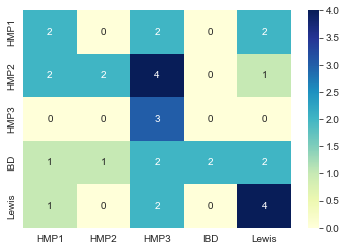

In [590]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [2,4,6,8,10,12,14,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=2, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring="roc_auc")

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

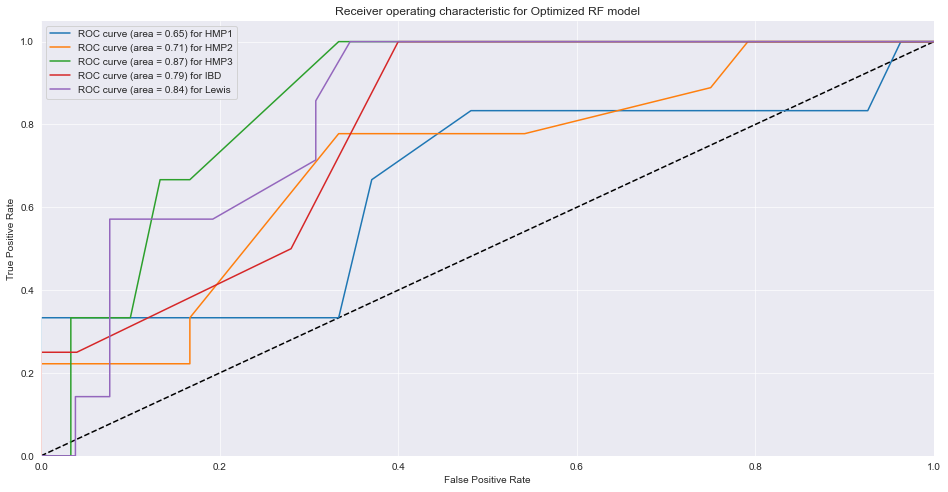

In [591]:
def plot_multiclass_roc(RF_clf, X_test, y_test, n_classes, figsize=(12, 6)):
    y_score = RF_clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Optimized RF model')
    labels = np.unique(y_test)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {round(roc_auc[i],2)}) for {labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.8)
    sns.despine()
    plt.show()
    return fig

RF_model_optimized_roc_auc_curve = plot_multiclass_roc(RF_clf, X_test, y_test, n_classes=5, figsize=(16, 8))

{1: 'HMP1', 2: 'HMP2', 3: 'HMP3', 4: 'IBD', 5: 'Lewis'}
[19:52:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split", "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[19:52:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split", "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[19:52:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split", "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[19:52:01] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split", "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


[19:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split", "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/

[19:52:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "min_samples_split", "n_gpus" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Model:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
            

<AxesSubplot:>

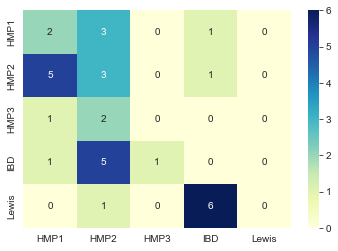

In [595]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
mapping = dict(zip(le.classes_, range(1, len(le.classes_)+1)))
mapping = {v: k for k, v in mapping.items()}
print(mapping)
parameters_XB = {
    'max_depth': [5],
    'objective': ['multi:softprob'],
    'num_class': [5],
    'n_gpus': [0],
    'gamma' : [0],
    'n_estimators': [100]}

XB_model = XGBClassifier.XGBClassifier(min_samples_split=5, random_state=0)
XB_clf = GridSearchCV(XB_model, parameters_XB, scoring="roc_auc")

XB_clf.fit(X_train, y_train)

print("Best Model:")
XB_model = XB_clf.best_estimator_
print(XB_model)

XB_predictions = XB_model.predict(X_test)
XB_predictions = pd.DataFrame(XB_predictions)
XB = XB_predictions[0].replace(mapping)

# creating a confusion matrix
labels = np.unique(y_test)
NXB = XB.to_numpy()
cm_XB = confusion_matrix(list(y_test),list(NXB),labels=labels)
cm_XB = pd.DataFrame(cm_XB, index=labels, columns=labels)
sns.heatmap(cm_XB, cmap="YlGnBu", annot=True)

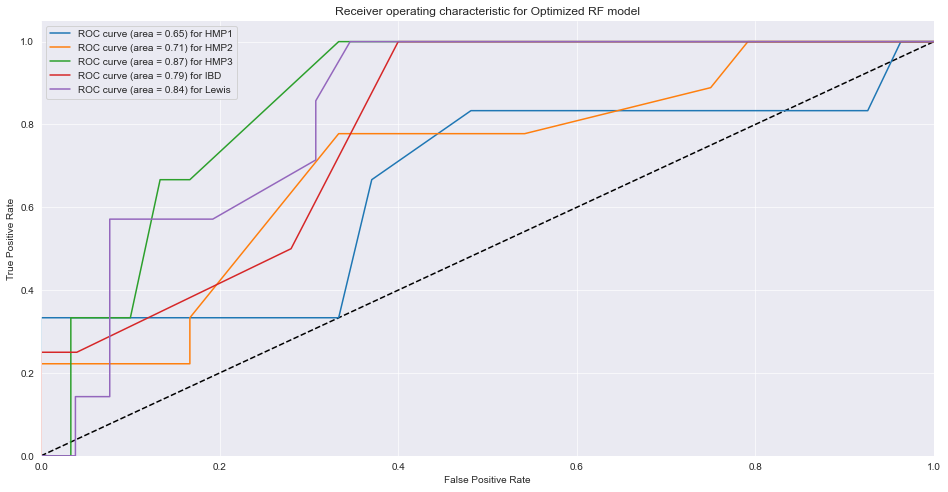

In [596]:
def plot_multiclass_roc(XB_clf, X_test, y_test, n_classes, figsize=(12, 6)):
    y_score = XB_clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Optimized RF model')
    labels = np.unique(y_test)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {round(roc_auc[i],2)}) for {labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.8)
    sns.despine()
    plt.show()
    return fig

RF_model_optimized_roc_auc_curve = plot_multiclass_roc(RF_clf, X_test, y_test, n_classes=5, figsize=(16, 8))

In [600]:
pca = PCA(n_components=5).fit(Feature)
X_pca = pca.transform(Feature)
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(Feature.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

['s__Phocaeicola_vulgatus', 's__Prevotella_copri_clade_A', 's__Bacteroides_ovatus', 's__Bacteroides_stercoris', 's__Akkermansia_muciniphila']


,0,1
0,PC1,s__Phocaeicola_vulgatus
1,PC2,s__Prevotella_copri_clade_A
2,PC3,s__Bacteroides_ovatus
3,PC4,s__Bacteroides_stercoris
4,PC5,s__Akkermansia_muciniphila


array([0.23237229, 0.13664003, 0.12019864, 0.08190577, 0.06428268])

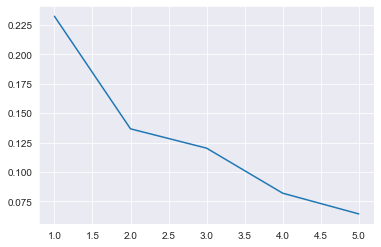

In [601]:
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,6))
pca.explained_variance_ratio_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

<AxesSubplot:title={'center':'PCA'}, xlabel='PC 1', ylabel='PC 3'>

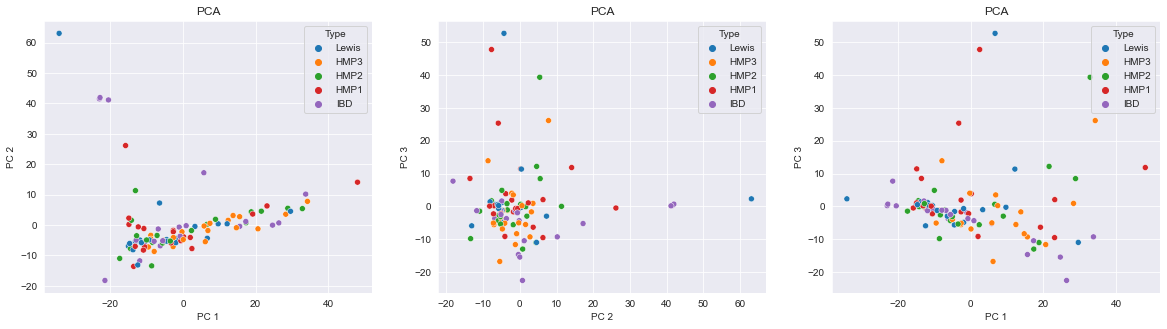

In [602]:
list_columns = list(Feature.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA")
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=combine_control_group['Type'])
plt.subplot(1,3,2)
plt.xlabel("PC 2")
plt.ylabel("PC 3")
plt.title("PCA")
sns.scatterplot(X_pca[:,1],X_pca[:,2],hue=combine_control_group['Type'])
plt.subplot(1,3,3)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.title("PCA")
sns.scatterplot(X_pca[:,0],X_pca[:,2], hue=combine_control_group['Type'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


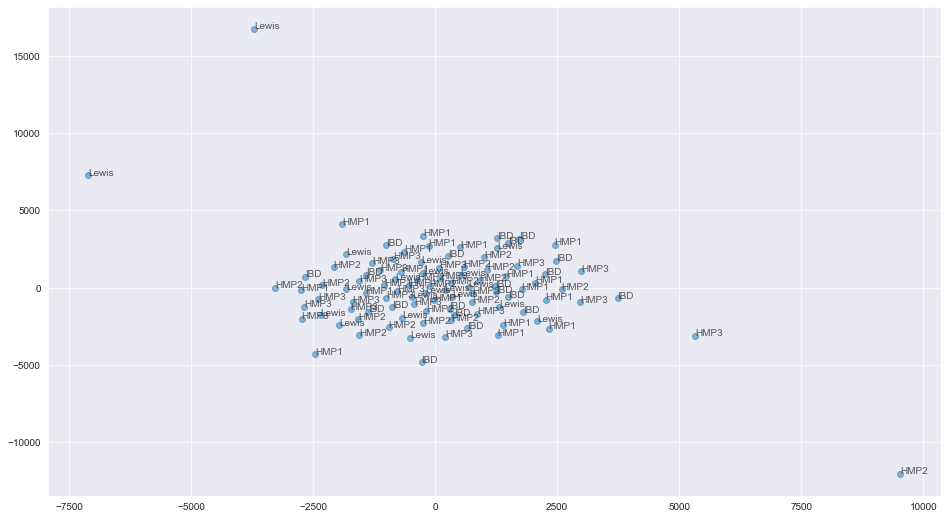

In [604]:
model = TSNE(learning_rate=1500,random_state=1)

# Apply fit_transform to normalized_movements: tsne_features
Cluster_Species_Pheno = [Feature]
for pheno in Cluster_Species_Pheno:
    tsne_features = model.fit_transform(pheno)

    # Select the 0th feature: xs
    xs = tsne_features[:, 0]

    # Select the 1st feature: ys
    ys = tsne_features[:, 1]

    # Scatter plot
    plt.figure(figsize=(16, 9))
    plt.scatter(xs, ys, alpha=0.5)

    # Annotate the points
    for x, y, company in zip(xs, ys, Target):
        plt.annotate(company, (x, y), fontsize=10, alpha=0.75)